# Neural Networks

### Time to play first !

1. Open the TensorFlow playground at https://playground.tensorflow.org/, select the dataset with
two clusters, the features x1 and x2 and keep zero hidden layers and linear activation. Train the model
by clicking on the play button. Does the classifier correctly learn the boundary?

2. Now select the XOR dataset and repeat the training? Does the classifier work?

3. Keeping the same dataset, try adding and removing features to see if the performance improves?
What is the minimal number of features that are needed to correctly learn the boundary? What are
the features? Why do they work well?

4. Now pick the concentric circles dataset. Repeat the feature selection process from the last point.

Now we can start with the real excercises !

*Adapted from `pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html`.*

## Example 1

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

PyTorch has two [primitives to work with data](https://pytorch.org/docs/stable/data.html):
``torch.utils.data.DataLoader`` and ``torch.utils.data.Dataset``.
``Dataset`` stores the samples and their corresponding labels, and ``DataLoader`` wraps an iterable around
the ``Dataset``.

PyTorch offers domain-specific libraries such as [TorchText](https://pytorch.org/text/stable/index.html),
[TorchVision](https://pytorch.org/vision/stable/index.html), and [TorchAudio](https://pytorch.org/audio/stable/index.html),
all of which include datasets. For this tutorial, we  will be using a TorchVision dataset.

The ``torchvision.datasets`` module contains ``Dataset`` objects for many real-world vision data like
MNIST, CIFAR. In this tutorial, we
use the FashionMNIST dataset. Every TorchVision ``Dataset`` includes two arguments: ``transform`` and
``target_transform`` to modify the samples and labels respectively.


In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data", # Path where data is stored
    train=True, # Training or test dataset
    download=True, # Download the data if not available locally
    transform=ToTensor(), # Feature transformations (convert images to tensors)
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:09<00:00, 2787175.06it/s]


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 2116079.49it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw




100%|██████████| 4422102/4422102 [00:01<00:00, 3443060.61it/s]


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5128806.89it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



We pass the ``Dataset`` as an argument to ``DataLoader``. This wraps an iterable over our dataset, and supports
automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e., each element
in the dataloader iterable will return a batch of 64 features and labels.



In [4]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size)


In [5]:
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

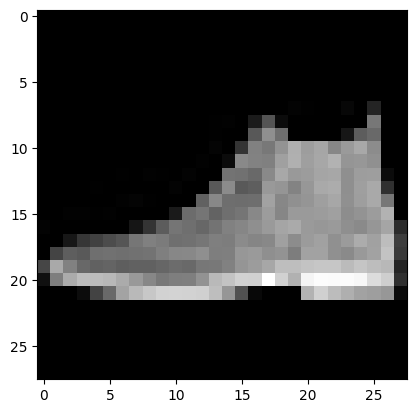

In [6]:
import matplotlib.pyplot as plt
print(X[0])
plt.imshow(X[0,0], cmap="gray")

To define a neural network in PyTorch, we use`nn.Sequential` and define the layers of the network. The `torch.nn` namespace provides all the building blocks you need to build your own neural network. Every module in PyTorch subclasses the `nn.Module` and a neural network is a module itself that consists of other modules (layers). This nested structure allows for building and managing complex architectures easily.

To accelerate operations in the neural network, we move it to the GPU if available.


In [7]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device}")


Using cuda


In [8]:
# Define model
model = nn.Sequential( # Ordered container of modules
    nn.Flatten(), # Convert the 28x28 matrix of pixels into an array of length 784
    nn.Linear(28*28, 512), # Apply a linear transformation on the input using weights and biases
    nn.ReLU(), # Non-linear activation
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
).to(device)

print(model) # Print the structure of the neural network

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)


To train a model, we need a [loss function](https://pytorch.org/docs/stable/nn.html#loss-functions)
and an [optimizer](https://pytorch.org/docs/stable/optim.html).

In [9]:
loss_fn = nn.CrossEntropyLoss()

learning_rate = 1e-3
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # Pass model parameters to optimizer

In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and
backpropagates the prediction error to adjust the model's parameters.



In [10]:
def train(dataloader, model, loss_fn, optimizer):
    '''
    This function implements the train loop. It iterates over the training dataset
    and try to converge to optimal parameters.
    '''
    size = len(dataloader.dataset)
    model.train() # Set the model to training mode
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction and loss
        pred = model(X) # Pass the data to the model to execute the model forward
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward() # Compute gradients of the loss w.r.t parameters (backward pass)
        optimizer.step() # Do a gradient descent step and adjust parameters
        optimizer.zero_grad() # Reset the gradients of model parameters to zero (gradients by default add up)

        if batch % 200 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

We also check the model's performance against the test dataset to ensure it is learning.


In [11]:
def test(dataloader, model, loss_fn):
    '''
    This function implements the validation/test loop. It iterates over the test
    dataset to check if the model performance is improving.
    '''
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval() # Set the model to evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad(): # Do not track gradients while evaluating (faster)
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item() # Compute CE loss on the batch
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() # Compute classification error
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

The training process is conducted over several iterations (*epochs*). We print the model's accuracy and loss at each epoch; we'd like to see the
accuracy increase and the loss decrease with every epoch.



In [ ]:
epochs = 8
for t in range(epochs):
    print(f"Epoch {t+1}\n")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

print("Done!")

# Example 2 : Two-Hidden Layer NN

In this first example you will train your first NN ! You will also validate and test your results. The code here is fully shown so that you can analyse it. In particular, be careful at the syntax and the standard commands that are used in pytorch.

In [13]:
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
# Define transformations for the training and validation sets
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True)

# Download and load the validation data
validationset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)
validationloader = torch.utils.data.DataLoader(
    validationset, batch_size=64, shuffle=False)


In [15]:
#Define a class conteining your model, a Two-Hidden Layer Neural Network. All the relevant parameters are specifies.
#Note the ReLU activation function.
class TwoHiddenLayerNN(nn.Module):
    def __init__(self):
        super(TwoHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)  # Input to first hidden layer
        self.fc2 = nn.Linear(256, 128)      # First hidden to second hidden
        self.fc3 = nn.Linear(128, 10)       # Second hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)            # Flatten the image
        x = self.relu(self.fc1(x))         # First hidden layer with ReLU
        x = self.relu(self.fc2(x))         # Second hidden layer with ReLU
        x = self.fc3(x)                    # Output layer
        return x

# Instantiate the network
net = TwoHiddenLayerNN()

In [16]:
#You have to specify a loss, i.e. cross-entropy in this case, and also a way to optimise your weights, i.e. Adam (Adaptive Moment Estimation) in this case. You can use whatever you prefer, also SGD as you will do below.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [17]:
#this example is very simple: we train our model onto our data and we want to monitor how the training and validation loss decreases with the number of epochs.
epochs = 10 
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        
    train_losses.append(running_loss / len(trainloader))
    train_accuracy = 100 * correct_train / total_train
    train_accuracies.append(train_accuracy)
    
    # Validation Phase
    net.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in validationloader:
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()
    
    val_losses.append(val_loss / len(validationloader))
    val_accuracy = 100 * correct_val / total_val
    val_accuracies.append(val_accuracy)
    
    print(f'Epoch {epoch+1}/{epochs}, '
          f'Train Loss: {train_losses[-1]:.4f}, '
          f'Validation Loss: {val_losses[-1]:.4f}, '
          f'Train Acc: {train_accuracy:.2f}%, '
          f'Validation Acc: {val_accuracy:.2f}%')


Epoch 1/10, Train Loss: 0.3477, Validation Loss: 0.1723, Train Acc: 89.47%, Validation Acc: 94.62%
Epoch 2/10, Train Loss: 0.1535, Validation Loss: 0.1186, Train Acc: 95.23%, Validation Acc: 96.30%
Epoch 3/10, Train Loss: 0.1113, Validation Loss: 0.1035, Train Acc: 96.48%, Validation Acc: 96.66%
Epoch 4/10, Train Loss: 0.0918, Validation Loss: 0.0896, Train Acc: 97.03%, Validation Acc: 97.14%
Epoch 5/10, Train Loss: 0.0754, Validation Loss: 0.0871, Train Acc: 97.54%, Validation Acc: 97.17%
Epoch 6/10, Train Loss: 0.0640, Validation Loss: 0.0899, Train Acc: 97.92%, Validation Acc: 97.23%
Epoch 7/10, Train Loss: 0.0580, Validation Loss: 0.0877, Train Acc: 98.12%, Validation Acc: 97.25%
Epoch 8/10, Train Loss: 0.0540, Validation Loss: 0.0765, Train Acc: 98.23%, Validation Acc: 97.75%
Epoch 9/10, Train Loss: 0.0458, Validation Loss: 0.0843, Train Acc: 98.54%, Validation Acc: 97.72%
Epoch 10/10, Train Loss: 0.0454, Validation Loss: 0.1089, Train Acc: 98.45%, Validation Acc: 97.06%


In [18]:
#We here print our final test accuracy.
net.eval()
correct_test = 0
total_test = 0
with torch.no_grad():
    for images, labels in validationloader:
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted == labels).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f'Final Test Accuracy: {test_accuracy:.2f}%')

Final Test Accuracy: 97.06%


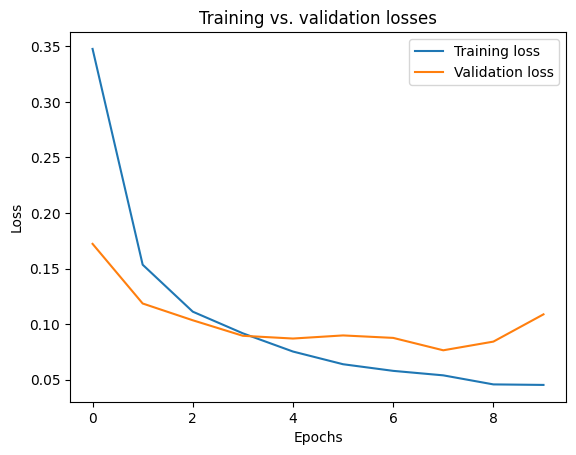

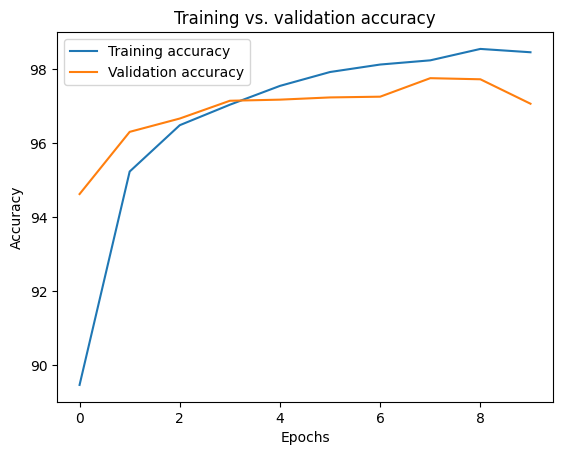

In [19]:
plt.title("Training vs. validation losses")
plt.plot(range(epochs), train_losses, label="Training loss")
plt.plot(range(epochs), val_losses, label="Validation loss")
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.legend()
plt.show()

plt.title("Training vs. validation accuracy")
plt.plot(range(epochs), train_accuracies, label="Training accuracy")
plt.plot(range(epochs), val_accuracies, label="Validation accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Excercise 1: Testing various activation functions.

The objective of this excercise is to investigate the impact of different activation functions on the performance of a two-hidden layer neural network using the FashionMNIST dataset.

In [20]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load training and validation datasets
trainset = torchvision.datasets.FashionMNIST(
    root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True)

validationset = torchvision.datasets.FashionMNIST(
    root='./data', train=False, download=True, transform=transform)
validationloader = torch.utils.data.DataLoader(
    validationset, batch_size=64, shuffle=False)

In [21]:
# Define a general network class where activation function can be specified
class TwoHiddenLayerNN(nn.Module):
    def __init__(self, activation_function):
        super(TwoHiddenLayerNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.activation_function = activation_function
        
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.activation_function(self.fc1(x))
        x = self.activation_function(self.fc2(x))
        x = self.fc3(x)
        return x
#you will change the activation_function in order to compare how different \sigma perform on this dataset

Below, using the examples above, train and validate your model for three different activation functions. Store all the results for the activation functions and the training and validation losses (for each epoch) properly. Also compute and store the training and validation accuracies for each epoch and each activation function.

In [22]:
# Activation functions to test. We compare a ReLu, a Sigmoid and a Hyperbolic tangent.
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh()
}

results = {}

def train_model(sigma):

    transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
    ])

    # Download and load the training data
    trainset = torchvision.datasets.MNIST(
        root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(
        trainset, batch_size=64, shuffle=True)

    # Download and load the validation data
    validationset = torchvision.datasets.MNIST(
        root='./data', train=False, download=True, transform=transform)
    validationloader = torch.utils.data.DataLoader(
        validationset, batch_size=64, shuffle=False)

    model = TwoHiddenLayerNN(sigma)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)


    epochs = 3
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
    
        for images, labels in trainloader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
            
        train_losses.append(running_loss / len(trainloader))
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)

        # Validation Phase
        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for images, labels in validationloader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
        
        val_losses.append(val_loss / len(validationloader))
        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy)
    
    return train_losses, val_losses, train_accuracy, val_accuracies


#this is a code example, you can define a function that trains your model and outputs the values of the losses.
#you can change this code accordingly to your preferences and your favourite approach.
for name, activation_function in activation_functions.items():
    print(f'\nTraining with {name} activation function:')
    train_losses, val_losses, train_acc, val_acc = train_model(activation_function)
    results[name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_acc': train_acc,
        'val_acc': val_acc
    }


Training with ReLU activation function:

Training with Sigmoid activation function:

Training with Tanh activation function:


Now plot the results. In a first plot, show the training and validation losses for all three activation functions with respect to the number of epochs. In a second plot show the training and validation accuracies for all the three activation functions used . Which activation function performed better?

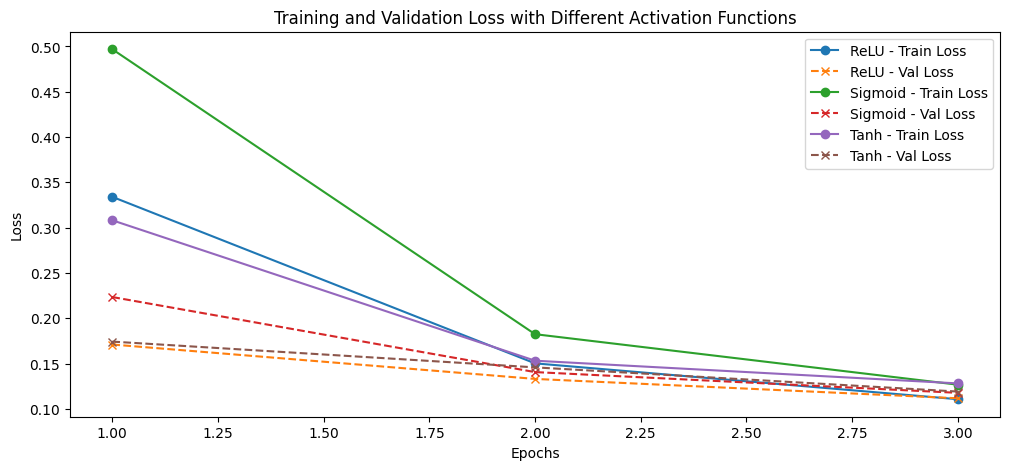

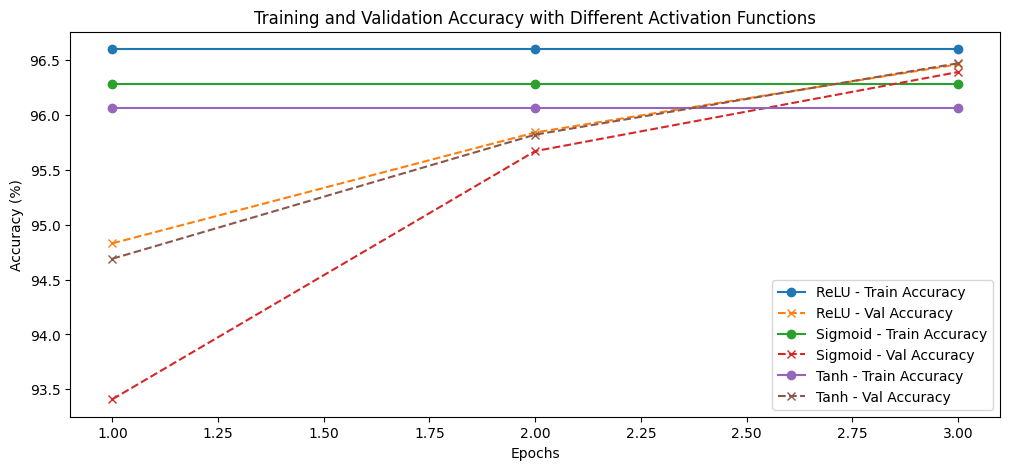

In [23]:
epochs_range = range(1, 16)

# Plot Losses
plt.figure(figsize=(12, 5))
plt.title('Training and Validation Loss with Different Activation Functions')

for activation, metrics in results.items():
    epochs = range(1, len(metrics['train_losses']) + 1)  # Epoch numbers
    plt.plot(epochs, metrics['train_losses'], label=f"{activation} - Train Loss", linestyle='-', marker='o')
    plt.plot(epochs, metrics['val_losses'], label=f"{activation} - Val Loss", linestyle='--', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracies
plt.figure(figsize=(12, 5))
plt.title('Training and Validation Accuracy with Different Activation Functions')

# Extract data for plotting
for activation, metrics in results.items():
    epochs = range(1, len(metrics['val_acc']) + 1)  # Epoch numbers
    plt.plot(epochs, [metrics['train_acc']] * len(epochs),  # Constant training accuracy per epoch
             label=f"{activation} - Train Accuracy", linestyle='-', marker='o')
    plt.plot(epochs, metrics['val_acc'], label=f"{activation} - Val Accuracy", linestyle='--', marker='x')

plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

# Excercise 2: Fit a sine function with a 2-hidden layers NN

Objective: Use a two-hidden layer neural network to approximate a sine function. Visualize the network's predictions compared to the actual function.

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate data as a sine function
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = np.sin(x)

# Convert to tensors as it is standard to do in pytoarch
x_tensor = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

In [25]:
#define your model, in this case let's call it a sine approximator.
#Note that this is just a 2-hidden layers neural networks with activation function Tanh
#Note also that the final output is just a scalar since we want to fit a 1-dimensional function.
class SineApproximator(nn.Module):
    def __init__(self):
        super(SineApproximator, self).__init__()
        self.fc1 = nn.Linear(1, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 1)
        self.tanh = nn.Tanh()
        
    def forward(self, x):
        x = self.tanh(self.fc1(x))
        x = self.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

net = SineApproximator()


In [26]:
#As a normal fit, using an MSE lost will be enough.
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

Following the examples above, train your 2-hidden layer NN onto your data points (the sine function). 

In [27]:
#use this code as a helper, since you may not be familiar with the commands you can use with pytoarch. 
epochs = 1000

losses =[]
for epoch in range(epochs):
    net.train()
    optimizer.zero_grad()
    outputs = net(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


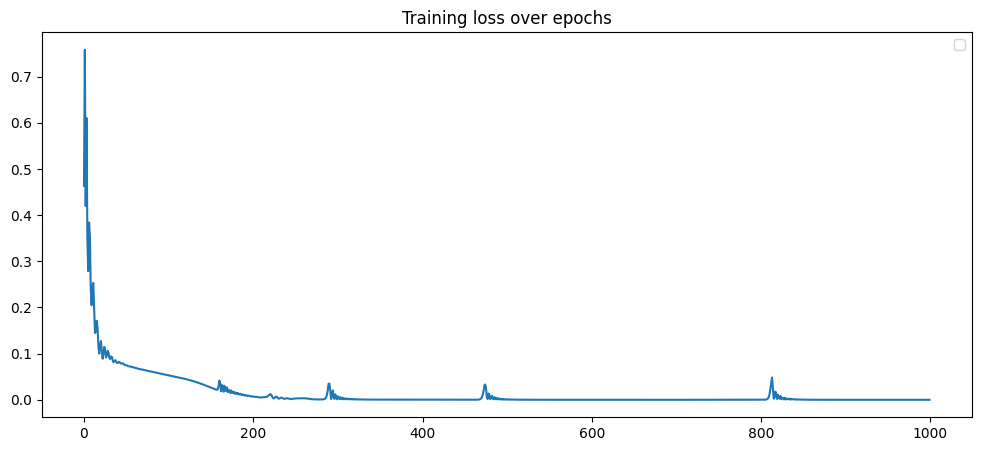

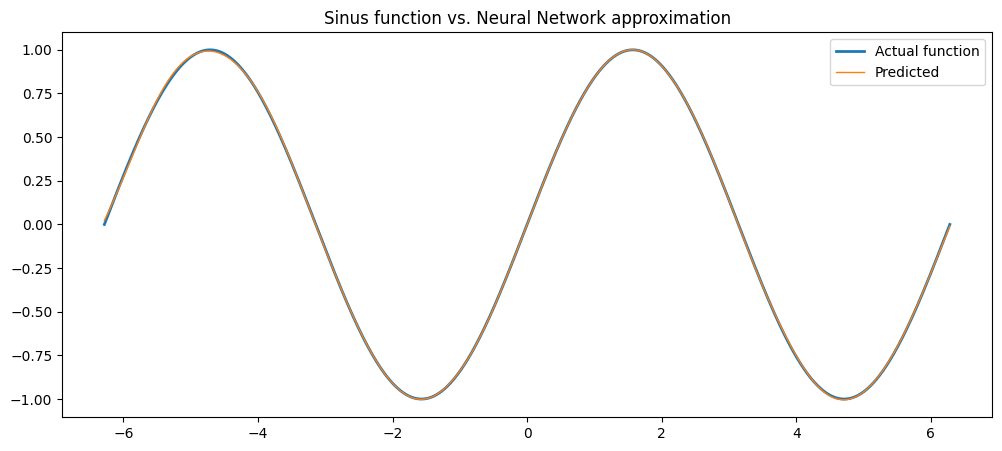

In [28]:
# Plot the original sine function and the network's approximation
net.eval()
with torch.no_grad():
    predicted = net(x_tensor).numpy()
    

# Plot the training loss over epochs
plt.figure(figsize=(12,5))
plt.title("Training loss over epochs")
plt.plot(range(epochs), losses)
plt.legend()
plt.show()

#Plot the actual sine function and the neural network approximation
plt.figure(figsize=(12,5))
plt.title("Sinus function vs. Neural Network approximation")
plt.plot(x, y, label="Actual function", linewidth = 2.0)
plt.plot(x, predicted, label="Predicted", linewidth = 1)
plt.legend()
plt.show()

# Exercise 3: Searching for Supersymmetric Collisions with Neural Nets

In [ ]:
import gzip
import shutil

# Decompress and save as a CSV
with gzip.open('./data/SUSY.csv.gz', 'rb') as f_in:
    with open('./data/SUSY.csv', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

data = np.loadtxt('./data/SUSY.csv', delimiter=',', skiprows=1)


The SUSY dataset consists of 5 million simulated Monte Carlo samples
of supersymmetric and non-supersymmetric collisions. The goal is to distinguish between a process
where new supersymmetric particles are produced and a background process. The first 8 features are
measurements of the final particle states, while the last 10 features are functions of the first 8 derived
by physicists to help to discriminate the events.

In [ ]:
import numpy as np
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets

We provide the class `SUSY_Dataset` to load the train and test datasets.

In [ ]:
class SUSY_Dataset(torch.utils.data.Dataset):
    """SUSY pytorch dataset."""

    def __init__(self, data_file, root_dir, dataset_size, train=True, transform=None, high_level_feats=None):
        """
        Args:
            data_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            dataset_size (int): Size of the full dataset which is splitted in 80% for train and 20% for test.
            train (bool, optional): If set to `True` load training data.
            transform (callable, optional): Optional transform to be applied on a sample.
            high_level_festures (bool, optional): If set to `True`, working with high-level features only.
                                        If set to `False`, working with low-level features only.
                                        Default is `None`: working with all features
        """

        import pandas as pd

        features=['SUSY','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi',
                'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2',
                'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

        low_features=['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi',
                'missing energy magnitude', 'missing energy phi']

        high_features=['MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2','S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

        # Number of datapoints to work with
        df = pd.read_csv(root_dir+data_file, header=None,nrows=dataset_size,engine='python')
        df.columns=features
        Y = df['SUSY']
        X = df[[col for col in df.columns if col!="SUSY"]]

        # Set training and test data size
        train_size=int(0.8*dataset_size)
        self.train=train

        if self.train:
            X=X[:train_size]
            Y=Y[:train_size]
            print("Training on {} examples".format(train_size))
        else:
            X=X[train_size:]
            Y=Y[train_size:]
            print("Testing on {} examples".format(dataset_size-train_size))

        self.root_dir = root_dir
        self.transform = transform

        # make datasets using only the 8 low-level features and 10 high-level features
        if high_level_feats is None:
            self.data=(X.values.astype(np.float32),Y.values.astype(int))
            print("Using both high and low level features")
        elif high_level_feats is True:
            self.data=(X[high_features].values.astype(np.float32),Y.values.astype(int))
            print("Using both high-level features only.")
        elif high_level_feats is False:
            self.data=(X[low_features].values.astype(np.float32),Y.values.astype(int))
            print("Using both low-level features only.")

    # override __len__ and __getitem__ of the Dataset() class

    def __len__(self):
        return len(self.data[1])

    def __getitem__(self, idx):

        sample=(self.data[0][idx,...],self.data[1][idx])

        if self.transform:
            sample=self.transform(sample)

        return sample

In [ ]:
training_data = SUSY_Dataset(
    data_file='SUSY.csv',
    root_dir='./',
    dataset_size=2000,
    train=True,
    )

test_data = SUSY_Dataset(
    data_file='SUSY.csv',
    root_dir='./',
    dataset_size=2000,
    train=False,
    )

FileNotFoundError: [Errno 2] No such file or directory: './SUSY.csv'

1. To train our neural network with SGD, we want to pass the samples in batches. Build the train and
test data loaders, setting the batch size to 100 and activating reshuffling at each epoch for the train
data by setting `shuffle=True`.

2. Define a fully connected ReLU neural network taking an 18-dimensional input, with two hidden layers with 200 neurons, one hidden layer with 100 neurons, and a final linear layer with two outputs.

3. Using the cross-entropy loss and SGD with learning rate 1e-2, train the model for 100 epochs (if you are using noto.epfl.ch, you can train for 30 epochs only). You can use the train and test loops defined in the previous exercise.